# Testing GraphSearch Distance Concepts

## Load Libraries

In [13]:
import srex_new
import operator
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Initialize some variables

In [14]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one

In [15]:
newStopWords = get_stop_words('en') # a big one

In [16]:
stop_words_list.extend(newStopWords) # all together

In [17]:
query                  = 'internet of things'
reference_terms        = ['iot']
nr_search_results      = 10

ranking_weight_type    = 'none' # it can be: 'none', 'linear' or 'inverse'
limit_distance         = 4 
sumarize               = 'none' 
include_reference_term = False
nr_of_graph_terms      = 5


In [22]:
# Articulo de revista científica IEEE Explore
#doc = srex.get_ieee_explore_article('article_number', '8316016')

# Ranking de documentos de IEEE Explore CON ponderación de documentos
results = srex_new.get_ieee_explore_ranking(query, nr_search_results)
results

# Ranking de documentos de IEEE Explore SIN ponderación de documentos
#results = srex.get_ieee_explore_ranking("search engine", 10)

[{'doi': '10.1109/JIOT.2019.2939552',
  'title': ' $ALC^{2}$ : When Active Learning Meets Compressive Crowdsensing for Urban Air Pollution Monitoring',
  'publisher': 'IEEE',
  'issue': '6',
  'issn': '2372-2541',
  'rank': 1,
  'volume': '6',
  'authors': {'authors': [{'affiliation': 'School of Computer Engineering and Science, Shanghai University, Shanghai, China',
     'authorUrl': 'https://ieeexplore.ieee.org/author/37085543201',
     'id': 37085543201,
     'full_name': 'Tong Liu',
     'author_order': 1,
     'authorAffiliations': {'authorAffiliation': ['School of Computer Engineering and Science, Shanghai University, Shanghai, China']}},
    {'affiliation': 'Department of Computer Science and Engineering, Shanghai Jiao Tong University, Shanghai, China',
     'authorUrl': 'https://ieeexplore.ieee.org/author/37280223500',
     'id': 37280223500,
     'full_name': 'Yanmin Zhu',
     'author_order': 2,
     'authorAffiliations': {'authorAffiliation': ['Department of Computer Science

In [19]:
list_of_documents = srex_new.get_ranking_as_weighted_documents(results, ranking_weight_type)
list_of_documents

[{'text': ' $ALC^{2}$ : When Active Learning Meets Compressive Crowdsensing for Urban Air Pollution Monitoring. As metropolises develop, air pollution has become a serious problem, especially in developing countries like China. Many governments and researchers have devoted themselves to tackling and solving this problem. With the proliferation of smartphones, mobile crowdsensing is becoming a promising paradigm for monitoring large-scale environmental phenomena. In a practical crowdsensing system, incentives should be provided to encourage the participation of rational smartphone users, because it incurs various costs on users to collect sensing data. However, monitoring fine-grained air pollution in a large urban area based on crowdsensing will lead to high payments, which makes designing an efficient incentive mechanism a challenging problem. Fortunately, compressive sensing (CS) has been proved as an effective technology to reduce the amount of collected data via exploiting the spat

In [20]:
sentences_list = srex_new.get_sentences_list_from_documents(list_of_documents)
sentences_list

[{'text': [' $ALC^{2}$ : When Active Learning Meets Compressive Crowdsensing for Urban Air Pollution Monitoring',
   'As metropolises develop, air pollution has become a serious problem, especially in developing countries like China',
   'Many governments and researchers have devoted themselves to tackling and solving this problem',
   'With the proliferation of smartphones, mobile crowdsensing is becoming a promising paradigm for monitoring large-scale environmental phenomena',
   'In a practical crowdsensing system, incentives should be provided to encourage the participation of rational smartphone users, because it incurs various costs on users to collect sensing data',
   'However, monitoring fine-grained air pollution in a large urban area based on crowdsensing will lead to high payments, which makes designing an efficient incentive mechanism a challenging problem',
   'Fortunately, compressive sensing (CS) has been proved as an effective technology to reduce the amount of collect

## Text transformations

Remove stopwords, punctuation, stemming, lematization

In [21]:
processed_sentences_list = srex_new.do_text_transformations_by_document(sentences_list, stop_words_list, lema=True, stem=False)
processed_sentences_list

[{'text': ['2 active learning meet compressive crowdsensing urban air pollution monitoring',
   'metropolis develop air pollution become serious problem especially developing country like china',
   'many government researcher devoted tackling solving problem',
   'proliferation smartphones mobile crowdsensing becoming promising paradigm monitoring environmental phenomenon',
   'practical crowdsensing system incentive provided encourage participation rational smartphone user incurs various cost user collect sensing data',
   'however monitoring air pollution large urban area based crowdsensing lead high payment make designing efficient incentive mechanism challenging problem',
   'fortunately compressive sensing c proved effective technology reduce amount collected data via exploiting spatial correlation among sensing data',
   'article employ c air pollution monitoring application sampled set location selected collect data provide incentive participant air pollution concentration unse

## Delete sentences that do not contain a reference term

## Calculate word positions

In [12]:
doc_pos_matrix = srex.get_documents_positions_matrix(processed_sentences_list)
doc_pos_matrix
#len(doc_pos_matrix)

[defaultdict(list,
             {'active': [0],
              'learning': [1],
              'meet': [2],
              'compressive': [3],
              'crowdsensing': [4],
              'urban': [5],
              'air': [6],
              'pollution': [7],
              'monitoring': [8]}),
 defaultdict(list,
             {'metropolis': [0],
              'develop': [1],
              'air': [2],
              'pollution': [3],
              'become': [4],
              'serious': [5],
              'problem': [6],
              'especially': [7],
              'developing': [8],
              'country': [9],
              'like': [10],
              'china': [11]}),
 defaultdict(list,
             {'many': [0],
              'government': [1],
              'researcher': [2],
              'devoted': [3],
              'tackling': [4],
              'solving': [5],
              'problem': [6]}),
 defaultdict(list,
             {'proliferation': [0],
              'smartphones': [

## Calculate vecinity matrix

In [51]:
vecinity_matrix = srex.get_vecinity_matrix(doc_pos_matrix, reference_term, limit_distance, sumarize, include_reference_term)
vecinity_matrix
#len(vecinity_matrix)

[{},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {'lightweight': [4],
  'trustworthy': [3],
  'authentication': [2],
  'scheme': [1],
  'application': [1]},
 {'revolution': [4],
  'numerous': [3],
  'internet': [2],
  'thing': [1],
  'application': [1],
  'flood': [2],
  'monitoring': [3],
  'wildfire': [4]},
 {'enhance': [4],
  'communication': [3],
  'metric': [2],
  'employed': [1],
  'appplication': [1]},
 {'however': [3],
  'integrated': [2],
  'technology': [1],
  'application': [1],
  'suffers': [2],
  'many': [3],
  'challenge': [4]},
 {'key': [4],
  'exchange': [3],
  'authentication': [2, 4],
  'model': [1],
  'application': [1],
  'resolve': [2],
  'd2d': [3]},
 {},
 {'network': [4],
  'architecture': [3],
  'consists': [2],
  'uavs': [1],
  'device': [1],
  'micro': [2],
  'base': [3],
  'station': [4]},
 {},
 {},
 {},
 {},
 {'internet': [2],
  'thing': 

In [52]:
unique_vecinity_dict = srex.get_unique_vecinity_dict(vecinity_matrix)
unique_vecinity_dict

{'power': [4, 4],
 'enhance': [3, 4],
 'system': [2, 1, 1],
 'performance': [1],
 'network': [1, 1, 1, 1, 4],
 'reinforcement': [4],
 'learning': [3],
 'framework': [2],
 'enables': [1],
 'device': [1, 1, 1, 1, 1],
 'quickly': [2],
 'obtain': [3],
 'optimal': [4],
 'jammer': [3, 1],
 'channel': [4],
 'transmitting': [3],
 'fake': [2],
 'transmission': [1],
 'undermine': [2],
 'proposed': [3],
 'strategy': [2],
 'allows': [1],
 'able': [2],
 'defeat': [3, 4],
 'powerful': [4],
 'reactive': [3, 2],
 'jamming': [2],
 'attack': [1],
 'art': [4],
 'defeating': [3],
 'targeted': [4],
 'generation': [3],
 'cryptographic': [2],
 'key': [1, 4],
 'wearable': [1],
 'platform': [2],
 'centralized': [4],
 'security': [1, 1],
 'play': [4],
 'important': [3],
 'role': [2],
 'insurability': [2],
 'distributed': [3],
 'interaction': [4],
 'among': [3],
 'apt': [2],
 'attacker': [1],
 'defender': [1],
 'cyber': [2, 3, 2],
 'insurance': [3],
 'insurer': [4],
 'systemic': [4],
 'risk': [2, 1],
 'interconn

In [53]:
terms_freq_dict = {k: len(v) for k, v in unique_vecinity_dict.items()}
terms_freq_dict

{'power': 2,
 'enhance': 2,
 'system': 3,
 'performance': 1,
 'network': 5,
 'reinforcement': 1,
 'learning': 1,
 'framework': 1,
 'enables': 1,
 'device': 5,
 'quickly': 1,
 'obtain': 1,
 'optimal': 1,
 'jammer': 2,
 'channel': 1,
 'transmitting': 1,
 'fake': 1,
 'transmission': 1,
 'undermine': 1,
 'proposed': 1,
 'strategy': 1,
 'allows': 1,
 'able': 1,
 'defeat': 2,
 'powerful': 1,
 'reactive': 2,
 'jamming': 1,
 'attack': 1,
 'art': 1,
 'defeating': 1,
 'targeted': 1,
 'generation': 1,
 'cryptographic': 1,
 'key': 2,
 'wearable': 1,
 'platform': 1,
 'centralized': 1,
 'security': 2,
 'play': 1,
 'important': 1,
 'role': 1,
 'insurability': 1,
 'distributed': 1,
 'interaction': 1,
 'among': 1,
 'apt': 1,
 'attacker': 1,
 'defender': 1,
 'cyber': 3,
 'insurance': 1,
 'insurer': 1,
 'systemic': 1,
 'risk': 2,
 'interconnected': 1,
 'mechanism': 1,
 'mitigate': 1,
 'achieving': 1,
 'perfect': 1,
 'often': 1,
 'impossible': 1,
 'internet': 3,
 'thing': 3,
 'highly': 1,
 'vulnerable': 1

In [62]:
foo = srex.normalize_dictionary_values(terms_freq_dict, [1,20])
foo

{'power': 5.75,
 'enhance': 5.75,
 'system': 10.5,
 'performance': 1.0,
 'network': 20.0,
 'reinforcement': 1.0,
 'learning': 1.0,
 'framework': 1.0,
 'enables': 1.0,
 'device': 20.0,
 'quickly': 1.0,
 'obtain': 1.0,
 'optimal': 1.0,
 'jammer': 5.75,
 'channel': 1.0,
 'transmitting': 1.0,
 'fake': 1.0,
 'transmission': 1.0,
 'undermine': 1.0,
 'proposed': 1.0,
 'strategy': 1.0,
 'allows': 1.0,
 'able': 1.0,
 'defeat': 5.75,
 'powerful': 1.0,
 'reactive': 5.75,
 'jamming': 1.0,
 'attack': 1.0,
 'art': 1.0,
 'defeating': 1.0,
 'targeted': 1.0,
 'generation': 1.0,
 'cryptographic': 1.0,
 'key': 5.75,
 'wearable': 1.0,
 'platform': 1.0,
 'centralized': 1.0,
 'security': 5.75,
 'play': 1.0,
 'important': 1.0,
 'role': 1.0,
 'insurability': 1.0,
 'distributed': 1.0,
 'interaction': 1.0,
 'among': 1.0,
 'apt': 1.0,
 'attacker': 1.0,
 'defender': 1.0,
 'cyber': 10.5,
 'insurance': 1.0,
 'insurer': 1.0,
 'systemic': 1.0,
 'risk': 5.75,
 'interconnected': 1.0,
 'mechanism': 1.0,
 'mitigate': 1.0

In [55]:
sorted_terms_freq_dict = sorted(terms_freq_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_terms_freq_dict

[('network', 20.0),
 ('device', 20.0),
 ('application', 15.25),
 ('system', 10.5),
 ('cyber', 10.5),
 ('internet', 10.5),
 ('thing', 10.5),
 ('data', 10.5),
 ('authentication', 10.5),
 ('power', 5.75),
 ('enhance', 5.75),
 ('jammer', 5.75),
 ('defeat', 5.75),
 ('reactive', 5.75),
 ('key', 5.75),
 ('security', 5.75),
 ('risk', 5.75),
 ('many', 5.75),
 ('performance', 1.0),
 ('reinforcement', 1.0),
 ('learning', 1.0),
 ('framework', 1.0),
 ('enables', 1.0),
 ('quickly', 1.0),
 ('obtain', 1.0),
 ('optimal', 1.0),
 ('channel', 1.0),
 ('transmitting', 1.0),
 ('fake', 1.0),
 ('transmission', 1.0),
 ('undermine', 1.0),
 ('proposed', 1.0),
 ('strategy', 1.0),
 ('allows', 1.0),
 ('able', 1.0),
 ('powerful', 1.0),
 ('jamming', 1.0),
 ('attack', 1.0),
 ('art', 1.0),
 ('defeating', 1.0),
 ('targeted', 1.0),
 ('generation', 1.0),
 ('cryptographic', 1.0),
 ('wearable', 1.0),
 ('platform', 1.0),
 ('centralized', 1.0),
 ('play', 1.0),
 ('important', 1.0),
 ('role', 1.0),
 ('insurability', 1.0),
 ('dis

In [56]:
first_sorted_terms_freq_dict = {k: v for k, v in list(sorted_terms_freq_dict)[:nr_of_graph_terms]}
first_sorted_terms_freq_dict

{'network': 20.0,
 'device': 20.0,
 'application': 15.25,
 'system': 10.5,
 'cyber': 10.5}

In [58]:
most_freq_distance_dict = {k: {'frequency':terms_freq_dict[k], 'distance':srex.np.median(unique_vecinity_dict[k])} for k in first_sorted_terms_freq_dict.keys()}

In [20]:
most_freq_distance_dict

{'network': {'frequency': 20.0, 'distance': 1.0},
 'device': {'frequency': 20.0, 'distance': 1.0},
 'application': {'frequency': 15.25, 'distance': 1.0},
 'system': {'frequency': 10.5, 'distance': 1.0},
 'internet': {'frequency': 10.5, 'distance': 2.0}}

In [21]:
graph = srex.getGraphViz(reference_term, most_freq_distance_dict, '0.7', 'deepskyblue')

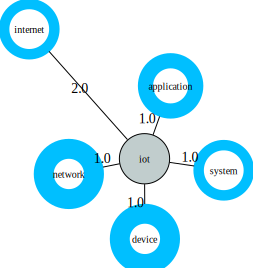

In [22]:
graph